In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/poli179images

/content/drive/My Drive/poli179images


4/4 [==============================] - 24s 6s/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


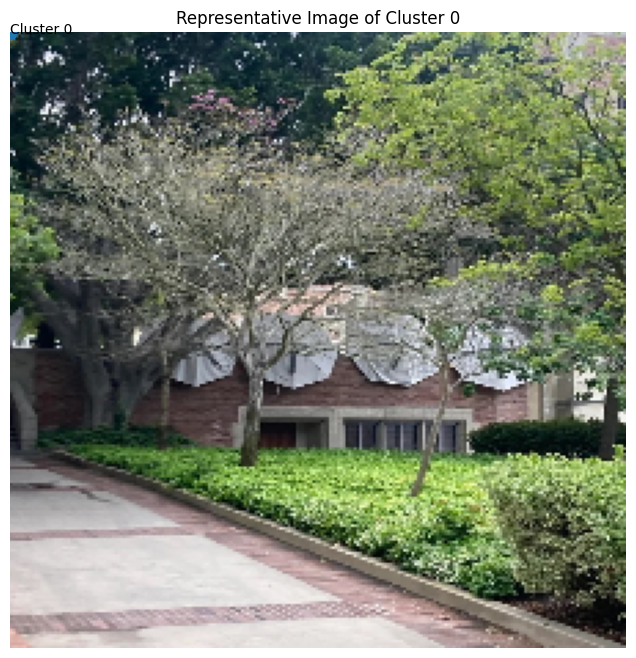

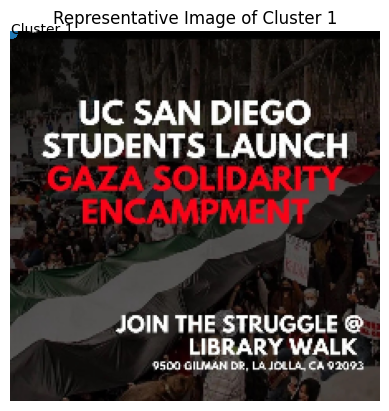

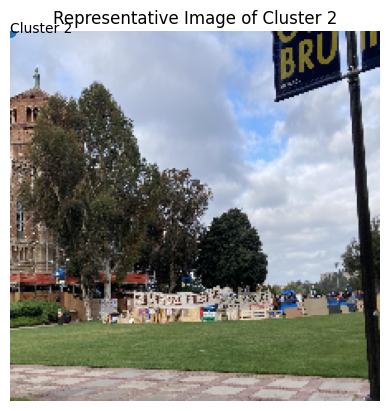

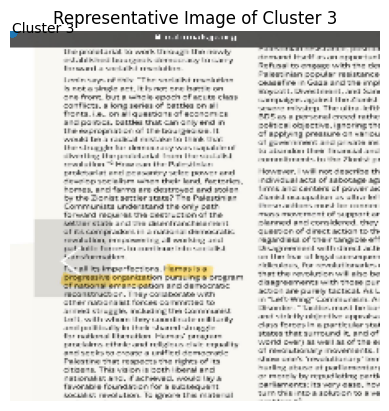

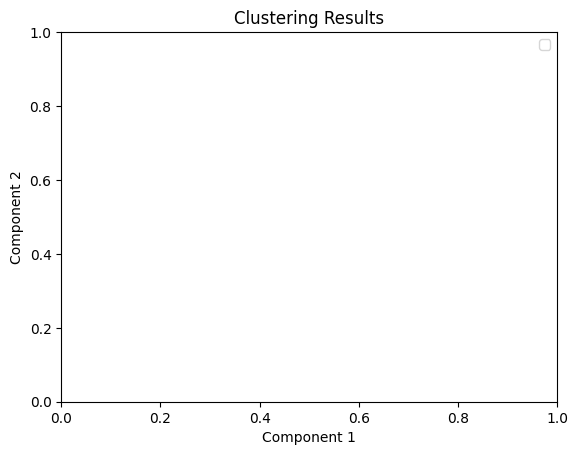

In [ ]:
import numpy as np
import os
import cv2
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to load and preprocess images
def load_imgs(directory, target_size=(500, 500)):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".jpeg"):
            img = cv2.imread(os.path.join(directory, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return images

# Load images from directory
image_dir = "/content/drive/My Drive/poli179images"
images = load_imgs(image_dir)

# Preprocess images
preprocessed_images = np.array([preprocess_input(img) for img in images])

# Extract features using ResNet50
features = model.predict(preprocessed_images)

# Normalize features
norm_features = features / np.linalg.norm(features, axis=1, keepdims=True)

# Perform K-means clustering with K-means++ initialization
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(norm_features)
labels = kmeans.labels_

# Perform PCA for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(norm_features)

# Visualize clustering results and display representative images
plt.figure(figsize=(12, 8))
for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    representative_img_index = cluster_indices[0]
    plt.scatter(reduced_features[cluster_indices, 0], reduced_features[cluster_indices, 1], label=f'Cluster {i}')
    plt.annotate(f'Cluster {i}', (reduced_features[representative_img_index, 0], reduced_features[representative_img_index, 1]))
    plt.imshow(images[representative_img_index])
    plt.title(f'Representative Image of Cluster {i}')
    plt.axis('off')
    plt.show()

plt.title('Clustering Results')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()


<Figure size 1200x800 with 0 Axes>

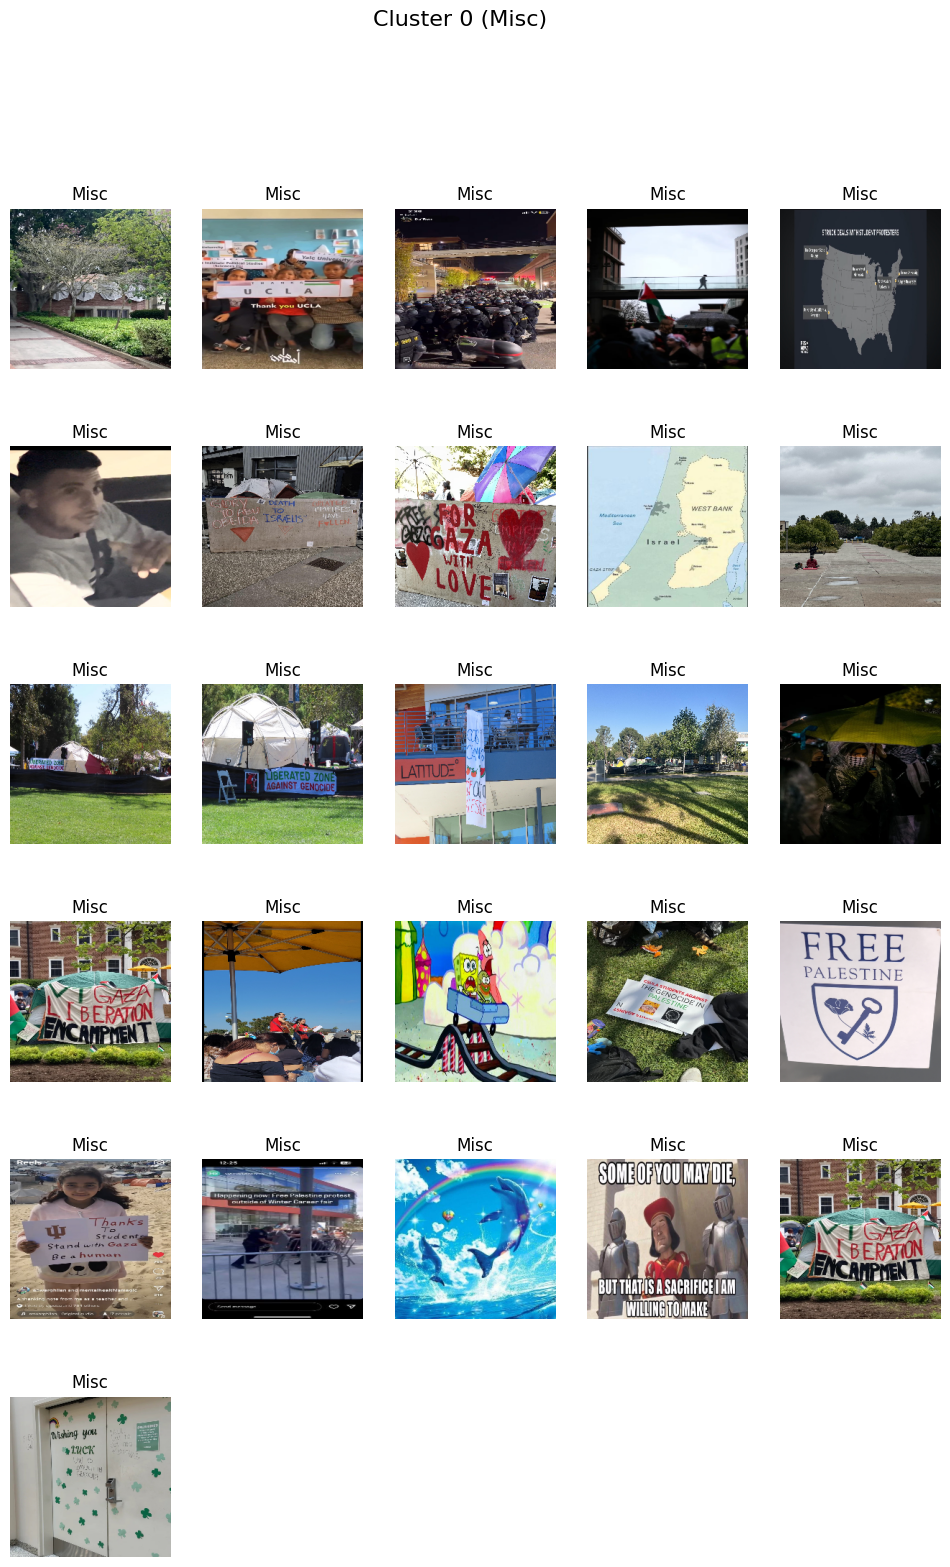

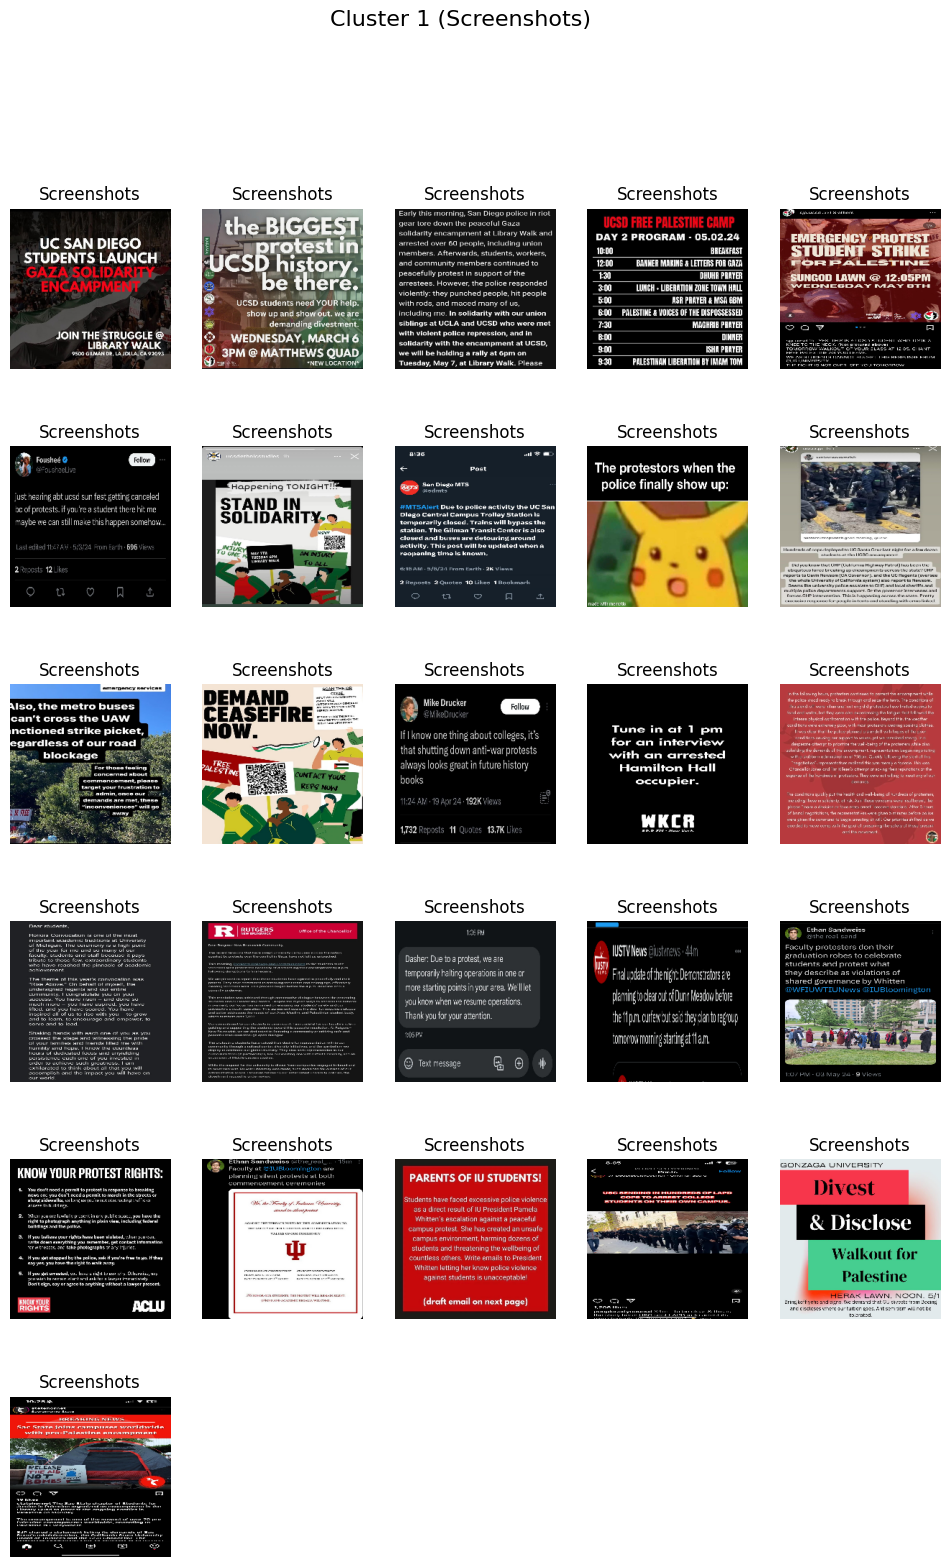

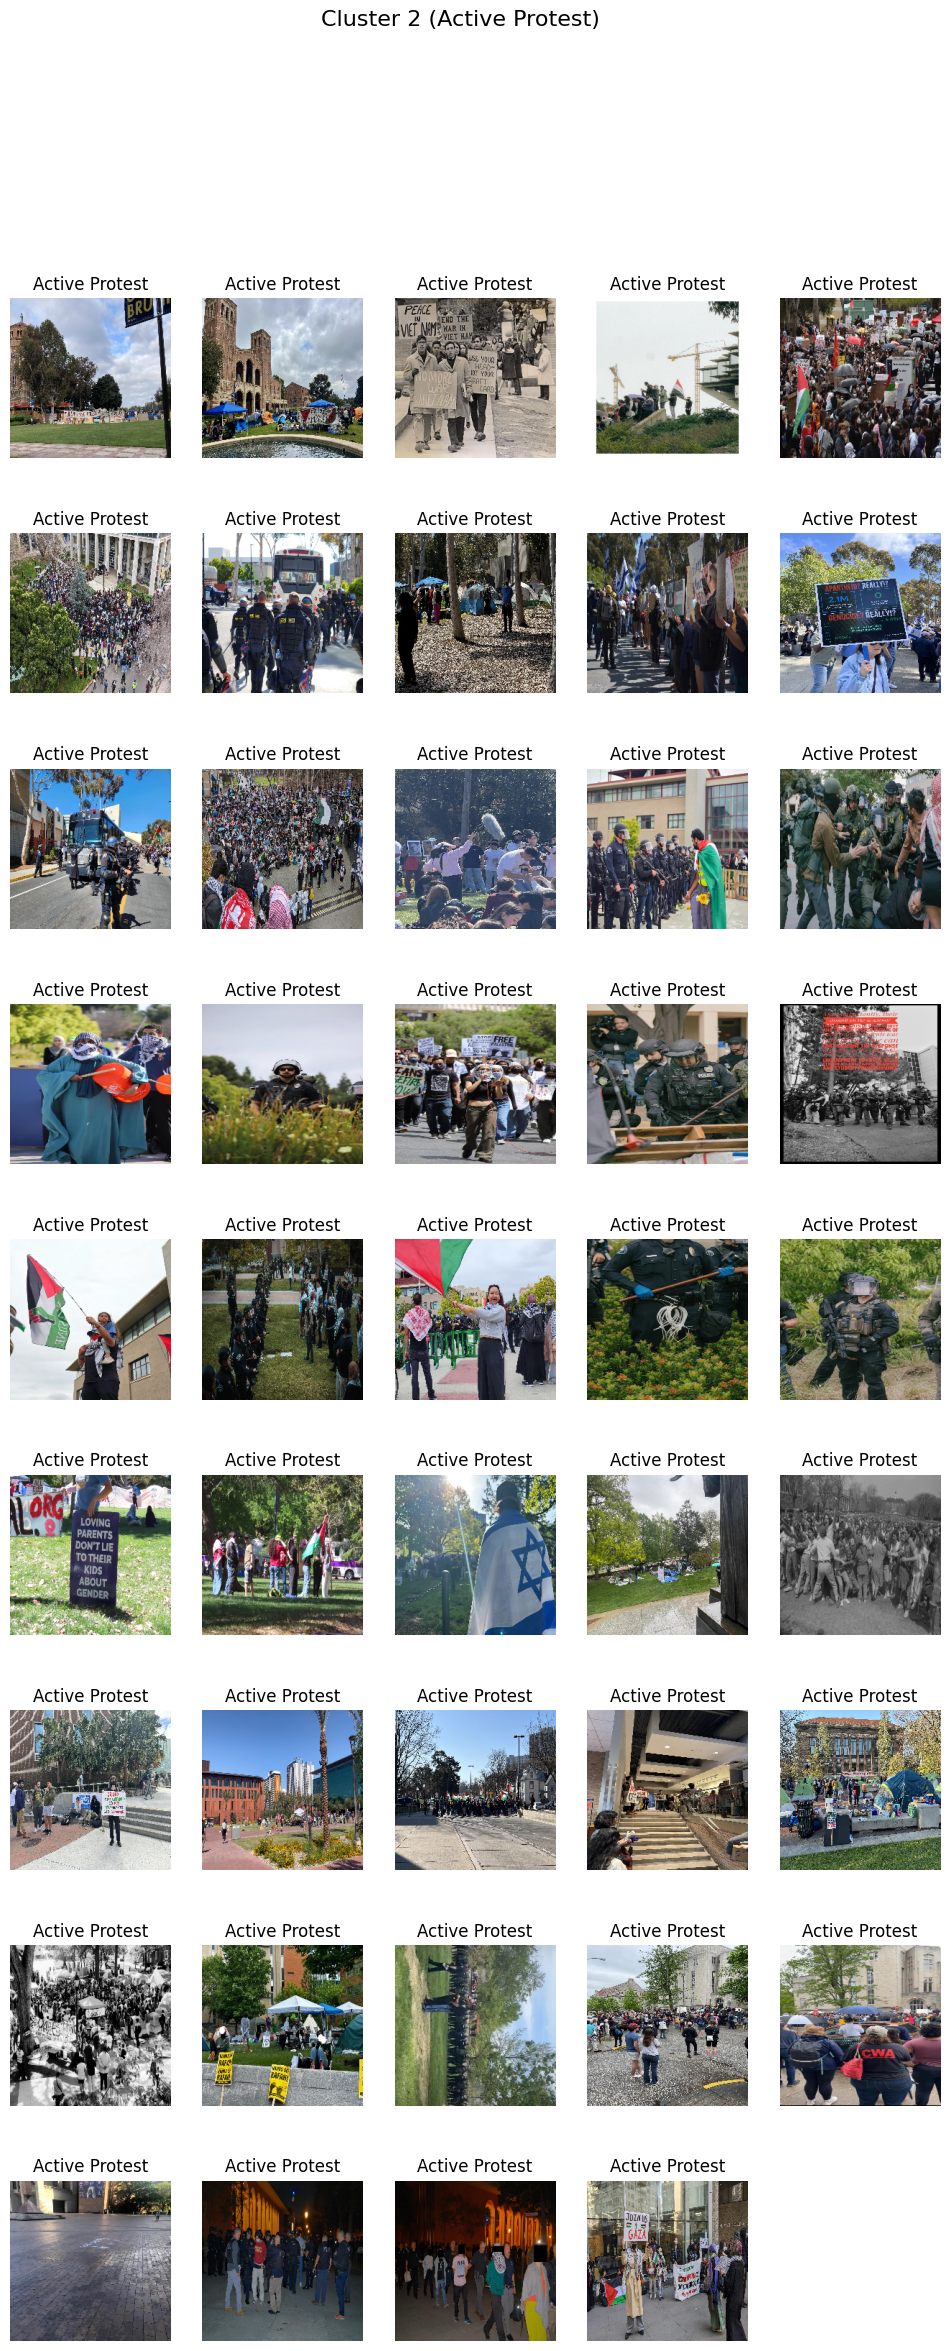

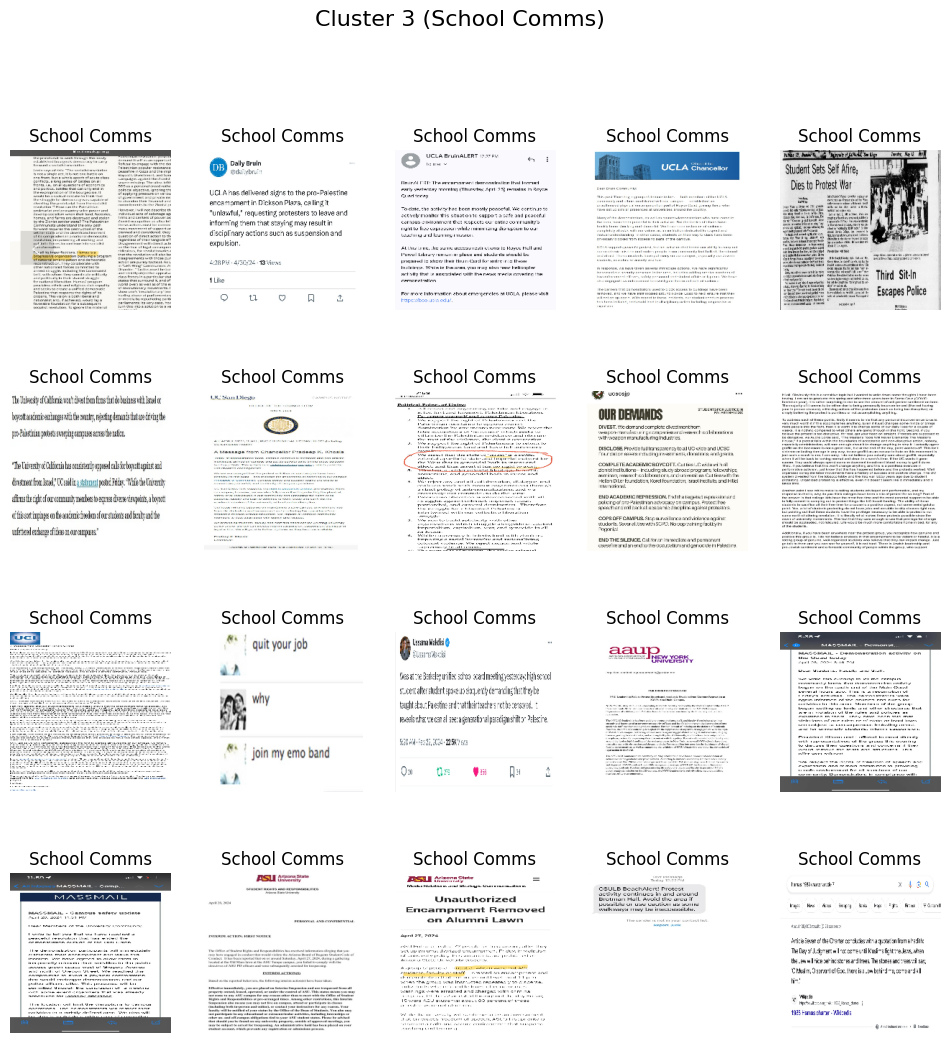

In [ ]:
# Define cluster names based on characteristics
cluster_names = ['Misc', 'Screenshots', 'Active Protest','School Comms']

# Visualize all images in each cluster with cluster names
plt.figure(figsize=(12, 8))
for i in range(k):
    cluster_indices = np.where(labels == i)[0]
    num_images = len(cluster_indices)
    num_rows = (num_images - 1) // 5 + 1
    plt.figure(figsize=(12, 3 * num_rows))
    for j, idx in enumerate(cluster_indices):
        plt.subplot(num_rows, 5, j + 1)
        plt.imshow(images[idx])
        plt.title(cluster_names[i])
        plt.axis('off')
    plt.suptitle(f'Cluster {i} ({cluster_names[i]})', fontsize=16)
    plt.show()

